# Imports and prepare data for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import copy
import os

In [2]:
# Two versions of the same data

## full_data includes the dataset with photo information, datetime, location, etc.
data = pd.read_csv(os.path.join("data", "gnomon_data.csv"))
data["Datetime"] = pd.to_datetime(data["Datetime"])


In [3]:
data

,Datetime,Day,Image filename,Location,Purpose,Cluster
0,2019-02-04 14:21:46,monday,week/img (1).jpg,outside,travel - walking,5.0
1,2019-02-04 14:25:02,monday,week/img (2).jpg,outside,travel - walking,5.0
2,2019-02-04 14:27:58,monday,week/img (3).jpg,outside,travel - walking,5.0
3,2019-02-04 14:30:46,monday,week/img (4).jpg,outside,travel - walking,5.0
4,2019-02-04 14:32:49,monday,week/img (5).jpg,outside,travel - walking,5.0
5,2019-02-04 14:35:19,monday,week/img (6).jpg,outside,travel - walking,2.0
6,2019-02-04 14:38:08,monday,week/img (7).jpg,outside,travel - walking,2.0
7,2019-02-04 14:41:00,monday,week/img (8).jpg,outside,travel - walking,5.0
8,2019-02-04 14:43:27,monday,week/img (9).jpg,outside,travel - walking,5.0
9,2019-02-04 14:46:46,monday,week/img (10).jpg,Founders Memorial Library,study,2.0


In [4]:
data.loc[1, "Datetime"] - data.loc[0, "Datetime"]

Timedelta('0 days 00:03:16')

In [5]:
def timePerLoc(df):
    """
    Takes a dataframe. Calculates the amount of time spent at each location
    each time a building was entered.
    """
    newDF = pd.DataFrame()
    
    loc = df.loc[0, "Location"]
    start = df.loc[0, "Datetime"]
    day = df.loc[0, "Day"]
    count = 0
    
    for i in df.index.values[1:]:
        count += 1
        if (df.loc[i, "Location"] != loc) or (df.loc[i, "Day"] != day):
            diff = df.loc[i-1, "Datetime"] - start
            D = {"Location": loc, 
                 "Start": start, 
                 "Day": day, 
                 "Tot_min": (diff.seconds/60), 
                 "n_pics": count}
            newDF = newDF.append(D, ignore_index=True)
            
            loc = df.loc[i, "Location"]
            start = df.loc[i, "Datetime"]
            day = df.loc[i, "Day"]
            count = 0
        
    return newDF
            

In [9]:
# Set the colors of the nodes, which represent the locations of the photographs

locations = data['Location'].unique()
n_locations = data['Location'].unique().shape[0]
cmap = matplotlib.cm.get_cmap('viridis')

loc_colors  = dict()

for i in range(n_locations):
    loc_colors[locations[i]] = cmap(i / n_locations)
    

In [10]:
locs = timePerLoc(data)

In [11]:
locs

,Day,Location,Start,Tot_min,n_pics
0,monday,outside,2019-02-04 14:21:46,21.683333,9.0
1,monday,Founders Memorial Library,2019-02-04 14:46:46,123.350000,29.0
2,monday,outside,2019-02-04 16:52:56,0.000000,1.0
3,monday,CSCI Building,2019-02-04 16:57:04,103.383333,32.0
4,monday,outside,2019-02-04 18:43:45,0.000000,1.0
5,monday,Faraday Hall,2019-02-04 18:47:30,111.183333,18.0
6,monday,outside,2019-02-04 20:40:47,16.583333,7.0
7,tuesday,outside,2019-02-05 11:07:40,10.966667,4.0
8,tuesday,Recreation and Wellness Center,2019-02-05 11:23:11,47.383333,16.0
9,tuesday,outside,2019-02-05 12:16:25,3.683333,2.0


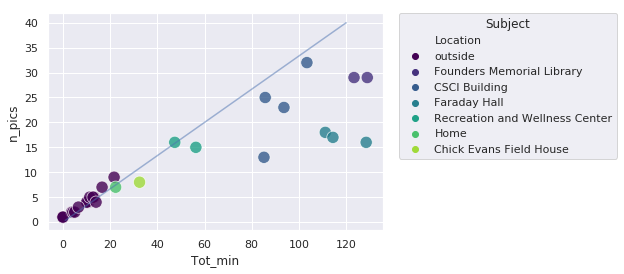

In [23]:
%matplotlib inline

sns.set()

# sns.scatterplot(x="Tot_min", y="n_pics", hue="Location", data=locs, alpha=0.8, s=100, palette='viridis')
ax = sns.scatterplot(x="Tot_min", y="n_pics", hue="Location", data=locs, alpha=0.8, s=150, palette=loc_colors)

plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

x = np.linspace(1, 120, 120)
y = x / 3

plt.plot(x, y, alpha=0.5)

plt.show()